Takes in .AWD, sleep log if it exists, calendar, and spits out some pretty pictures

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, '/data/MoodGroup/actigraphy/gavi/actigraPy') 

import actigraPy.actigraPy as act
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

/data/MoodGroup/actigraphy/gavi/actigraPy/actigraPy/actigraPy.py:23: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.backends.tkagg as tkagg


In [2]:
# data and log directories
sub = 'TEST' #subject NUMBER as STRING
sub_long = 'TEST'

out_dir = '/data/MoodGroup/actigraphy/gavi/actigraPy/data/output' #output directory
data_dir = '/data/MoodGroup/actigraphy/gavi/actigraPy/data'

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


## Subject and directory info

In [22]:
# data and log directories
sub = '101' #subject NUMBER as STRING
sub_long = 'sub-MOA'+sub

out_dir = '/data/MoodGroup/actigraphy/KMOA/derivatives/preproc/'+sub_long #output directory
data_dir = '/data/MoodGroup/actigraphy/KMOA/raw/' + sub_long

if not os.path.exists(out_dir):
    os.mkdir(out_dir)


In [3]:
fn = {}
#.AWD
awd_fn = os.path.join(data_dir, sub_long+'_0.AWD')
#sleeplog
fn['cal']= os.path.join(data_dir, sub_long + '_calendar_log.xls')
#calendar
fn['log'] = os.path.join(data_dir, sub_long+'_sleeplog.xls')
logs = []
Mtimes_fn = os.path.join(out_dir,sub_long+'_Mtimes_edit.csv')
orig_fn = os.path.join(out_dir,sub_long+'_Mtimes.csv')

if os.path.isfile(awd_fn):
    for name in fn.keys():
        if os.path.isfile(fn[name]):
            print("%s has %s file at %s"%(sub,name,fn[name]))
            logs.append(fn[name])
        else:
            print("no " + name)
            fn[name] = ''
else:
    print("DO NOT CONTINUE!! THERE IS NO AWD FILE")

TEST has cal file at /data/MoodGroup/actigraphy/gavi/actigraPy/data/TEST_calendar_log.xls
TEST has log file at /data/MoodGroup/actigraphy/gavi/actigraPy/data/TEST_sleeplog.xls


In [4]:
orig_fn

'/data/MoodGroup/actigraphy/gavi/actigraPy/data/output/TEST_Mtimes.csv'

### Read Mtimes file

Figure out where to clip awd file

In [16]:
#read AWD file
awd_dat = act.read_AWD(awd_fn)
idx={'start':[0],'end':[len(awd_dat['dt_list'])-1]}
#get the start and stops from each log if they exist
for log in logs:
    log_dat, kw_dat, comments = act.read_log(log,awd_dat)
    
    if 'watch_on' in kw_dat.keys():
        on_date = kw_dat['watch_on'].iloc[0]['OnDate']
        on_time = kw_dat['watch_on'].iloc[0]['OnTime']
        on = datetime(on_date.year,on_date.month,on_date.day,on_time.hour,on_time.minute)
        #check if that time is in dt_list:
        if awd_dat['dt_list'].count(on) > 0:
            on_idx=awd_dat['dt_list'].index(on)
            idx['start'].append(on_idx)

    if 'watch_off' in kw_dat.keys():
        off_date = kw_dat['watch_off'].iloc[0]['OffDate']
        off_time = kw_dat['watch_off'].iloc[0]['OffTime']
        off = datetime(off_date.year,off_date.month,off_date.day,off_time.hour,off_time.minute)
        if awd_dat['dt_list'].count(off) > 0:
            off_idx=awd_dat['dt_list'].index(off)
            idx['end'].append(off_idx)
 
idx

{'start': [0, 144], 'end': [4741]}

## <font color='red'>This part needs user input! Use your judgment to decide which starts and ends from above to go with</font>


In [17]:
start = max(idx['start'])
end = min(idx['end'])
print('start = %d, end = %d'%(start,end))

start = 144, end = 4741


In [18]:
#modify these according to output from above!!
#start =0
#end = 45283
lim = [awd_dat['DateTime'][start],awd_dat['DateTime'][end]]
clip_dat = act.clip_dat(lim,awd_dat)

Now just run these cells in order to extract comments and write Mtimes

In [19]:
importlib.reload(act)
mk_idx,mc_dict=act.read_Mtimes(Mtimes_fn,awd_dat)

cal
g
log
m
z


In [20]:
mk_idx_mini = mk_idx
mk_idx_mini['start_mask']=[start,end]
if 'M' in mk_idx_mini.keys():
    del mk_idx_mini['M']

act.write_dat(awd_dat,mk_idx_mini,os.path.join(out_dir,sub_long))

DateTime  activity M   cal  g  log  m  z  start_mask
0     08-Feb-16 01:16 PM       308       1  0    0  0  1           0
1     08-Feb-16 01:17 PM       515       1  0    0  0  1           0
2     08-Feb-16 01:18 PM        84       1  0    0  0  1           0
3     08-Feb-16 01:19 PM         0       1  0    0  0  1           0
4     08-Feb-16 01:20 PM        11       1  0    0  0  1           0
5     08-Feb-16 01:21 PM         0       1  0    0  0  1           0
6     08-Feb-16 01:22 PM         0       1  0    0  0  1           0
7     08-Feb-16 01:23 PM         0       1  0    0  0  1           0
8     08-Feb-16 01:24 PM         0       1  0    0  0  1           0
9     08-Feb-16 01:25 PM         3       1  0    0  0  1           0
10    08-Feb-16 01:26 PM         0       1  0    0  0  1           0
11    08-Feb-16 01:27 PM        38       1  0    0  0  1           0
12    08-Feb-16 01:28 PM         0       1  0    0  0  1           0
13    08-Feb-16 01:29 PM        28       1  0    0  0  1           0
14    08-Feb-16 01:30 PM         0       1  0    0  0  1           0
15    08-Feb-16 01:31 PM         0       1  0    0  0  1           0
16    08-Feb-16 01:32 PM         0       1  0    0  0  1           0
17    08-Feb-16 01:33 PM         0       1  0    0  0  1           0
18    08-Feb-16 01:34 PM         0       1  0    0  0  1           0
19    08-Feb-16 01:35 PM         0       1  0    0  0  1           0
20    08-Feb-16 01:36 PM         0       1  0    0  0  1           0
21    08-Feb-16 01:37 PM         0       1  0    0  0  1           0
22    08-Feb-16 01:38 PM         0       1  0    0  0  1           0
23    08-Feb-16 01:39 PM         0       1  0    0  0  1           0
24    08-Feb-16 01:40 PM         0       1  0    0  0  1           0
25    08-Feb-16 01:41 PM         0       1  0    0  0  1           0
26    08-Feb-16 01:42 PM         0       1  0    0  0  1           0
27    08-Feb-16 01:43 PM         0       1  0    0  0  1           0
28    08-Feb-16 01:44 PM         0       1  0    0  0  1           0
29    08-Feb-16 01:45 PM         0       1  0    0  0  1           0
...                  ...       ... ..  ... ..  ... .. ..         ...
4712  11-Feb-16 07:48 PM        62       0  0    0  0  0           1
4713  11-Feb-16 07:49 PM        32       0  0    0  0  0           1
4714  11-Feb-16 07:50 PM        35       0  0    0  0  0           1
4715  11-Feb-16 07:51 PM        94       0  0    0  0  1           1
4716  11-Feb-16 07:52 PM         8       0  0    0  0  1           1
4717  11-Feb-16 07:53 PM        20       0  0    0  0  1           1
4718  11-Feb-16 07:54 PM        11       0  0    0  0  1           1
4719  11-Feb-16 07:55 PM         0       0  0    0  0  1           1
4720  11-Feb-16 07:56 PM        40       0  0    0  0  1           1
4721  11-Feb-16 07:57 PM        11       0  0    0  0  1           1
4722  11-Feb-16 07:58 PM         2       0  0    0  0  1           1
4723  11-Feb-16 07:59 PM        12       0  0    0  0  1           1
4724  11-Feb-16 08:00 PM         9       0  0    0  0  1           1
4725  11-Feb-16 08:01 PM        21       0  0    0  0  1           1
4726  11-Feb-16 08:02 PM        14       0  0    0  0  1           1
4727  11-Feb-16 08:03 PM        11       0  0    0  0  0           1
4728  11-Feb-16 08:04 PM        81       0  0    0  0  0           1
4729  11-Feb-16 08:05 PM       159       0  0    0  0  0           1
4730  11-Feb-16 08:06 PM       362       0  0    0  0  0           1
4731  11-Feb-16 08:07 PM        97       0  0    0  0  0           1
4732  11-Feb-16 08:08 PM        29       0  0    0  0  0           1
4733  11-Feb-16 08:09 PM        31       0  0    0  0  0           1
4734  11-Feb-16 08:10 PM        42       0  0    0  0  0           1
4735  11-Feb-16 08:11 PM        11       0  0    0  0  0           1
4736  11-Feb-16 08:12 PM       104       0  0    0  0  0           1
4737  11-Feb-16 08:13 PM        44       0  0    0  0  0           1
4738  11-Feb-1

## Make graphs

In [21]:
mk_idx['g']

array([2056, 2093])

In [22]:
wanted_plots=['g']
plots = {}
del_com={}
for name in wanted_plots:
    if name in mk_idx.keys():
        plots[name]=mk_idx[name] - start
        del_com[name]=((np.where(plots[name]<0)[0])//2).tolist()[::2]
        plots[name]=plots[name][np.where(plots[name]>0)]

In [23]:
wanted = ['g']
coms=[]
idxs=[]
for mm in wanted:
    print(mm)
    idxs= idxs +(mc_dict[mm]['idxs'])
    coms= coms + (mc_dict[mm]['comments'])
    if mm in del_com.keys():
        for i in range(0,len(del_com[mm])):
            idxs.pop(0)
            coms.pop(0)
zipped_pairs = zip(idxs,coms)
gc_coms = [x for _, x in sorted(zipped_pairs)]
gc_idx = np.sort(idxs) - start

gc=[np.asarray(gc_idx),gc_coms]

g


4
08-Feb-16
0 499
input 0 []
[]
09-Feb-16
500 1939
input 0 [-1912]
plot this [-1912, 1939]
[0]
10-Feb-16
1940 3379
input 0 [1949]
plot this [-1940, 1949]
[]
11-Feb-16
3380 4596
input 0 []
[]
Saving... /data/MoodGroup/actigraphy/gavi/actigraPy/data/output/TEST_M+edits.png
Done


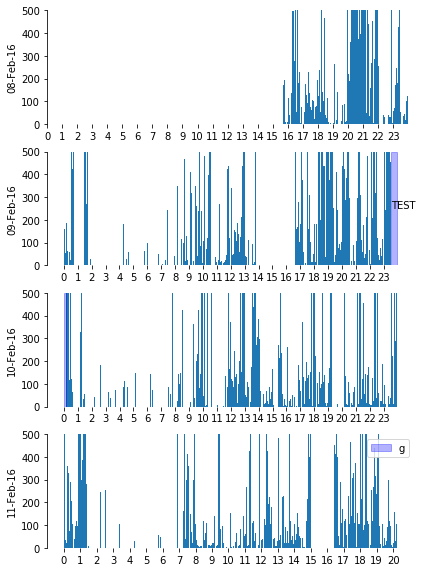

In [33]:
importlib.reload(act)

act.plot_awd(clip_dat,plots,max_act=500,show=False,comments=gc,fn_pref=os.path.join(out_dir,sub+'_M+edits'),plot_type='single',debug=True)
